# Variational Autoencoder

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import sys
print (sys.version)

3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import importlib
import pandas as pd
from scipy.stats import bernoulli
from matplotlib import cm
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
import random

import generative_lib

In [56]:
importlib.reload(generative_lib)

<module 'generative_lib' from '/Users/joriococola/Desktop/CS 6140/project 6140/GitHub/CS6140_LatentClassify/ipython notebooks/generative_lib.py'>

In [12]:
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

## Setting

In [13]:
# Dataset
random_seed = 123
DOWNLOAD = True
SHUFFLE_TR = True
SHUFFLE_TS = False

# Architecture
num_features = 784
num_hidden_1 = 500
num_latent = 15

device = "cpu"

# Training
learning_rate = 0.001
num_epochs = 6
batch_size = 28

## MNIST DATASET

In [14]:
# Note transforms.ToTensor() scales input images to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=DOWNLOAD)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())

In [15]:
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=SHUFFLE_TR)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=SHUFFLE_TS)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([28, 1, 28, 28])
Image label dimensions: torch.Size([28])


## Model

In [16]:
torch.manual_seed(random_seed)
model = generative_lib.VAE(num_features, num_hidden_1, num_latent)

## COST AND OPTIMIZER

In [17]:
model = model.to("cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

## Training

In [18]:
for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        # don't need labels, only the images (features)
        features = features.view(-1, 28*28)

        ### FORWARD AND BACK PROP
        z_mean, z_log_var, encoded, decoded = model(features)

        # cost = reconstruction loss + Kullback-Leibler divergence
        kl_divergence = (0.5 * (z_mean**2 + 
                                torch.exp(z_log_var) - z_log_var - 1)).sum()
        pixelwise_bce = F.binary_cross_entropy(decoded, features, size_average=False)
        cost = kl_divergence + pixelwise_bce
        
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_dataset)//batch_size, cost))

Epoch: 001/006 | Batch 000/2142 | Cost: 15484.8174
Epoch: 001/006 | Batch 050/2142 | Cost: 5754.7188
Epoch: 001/006 | Batch 100/2142 | Cost: 5335.6426
Epoch: 001/006 | Batch 150/2142 | Cost: 4388.2827
Epoch: 001/006 | Batch 200/2142 | Cost: 4368.0576
Epoch: 001/006 | Batch 250/2142 | Cost: 4219.2568
Epoch: 001/006 | Batch 300/2142 | Cost: 4148.5044
Epoch: 001/006 | Batch 350/2142 | Cost: 3901.8894
Epoch: 001/006 | Batch 400/2142 | Cost: 3701.4800
Epoch: 001/006 | Batch 450/2142 | Cost: 4119.0425
Epoch: 001/006 | Batch 500/2142 | Cost: 3979.9998
Epoch: 001/006 | Batch 550/2142 | Cost: 3764.1235
Epoch: 001/006 | Batch 600/2142 | Cost: 3411.5754
Epoch: 001/006 | Batch 650/2142 | Cost: 3858.5957
Epoch: 001/006 | Batch 700/2142 | Cost: 3594.1599
Epoch: 001/006 | Batch 750/2142 | Cost: 3629.4631
Epoch: 001/006 | Batch 800/2142 | Cost: 3518.2473
Epoch: 001/006 | Batch 850/2142 | Cost: 3186.9407
Epoch: 001/006 | Batch 900/2142 | Cost: 3481.9771
Epoch: 001/006 | Batch 950/2142 | Cost: 3213.2642

Epoch: 004/006 | Batch 1700/2142 | Cost: 3258.3716
Epoch: 004/006 | Batch 1750/2142 | Cost: 2947.9531
Epoch: 004/006 | Batch 1800/2142 | Cost: 3125.9370
Epoch: 004/006 | Batch 1850/2142 | Cost: 3139.7183
Epoch: 004/006 | Batch 1900/2142 | Cost: 3019.9287
Epoch: 004/006 | Batch 1950/2142 | Cost: 3046.3611
Epoch: 004/006 | Batch 2000/2142 | Cost: 3308.2188
Epoch: 004/006 | Batch 2050/2142 | Cost: 3142.8254
Epoch: 004/006 | Batch 2100/2142 | Cost: 2806.5874
Epoch: 005/006 | Batch 000/2142 | Cost: 3133.0713
Epoch: 005/006 | Batch 050/2142 | Cost: 3163.3933
Epoch: 005/006 | Batch 100/2142 | Cost: 3052.0969
Epoch: 005/006 | Batch 150/2142 | Cost: 2774.2065
Epoch: 005/006 | Batch 200/2142 | Cost: 3043.1704
Epoch: 005/006 | Batch 250/2142 | Cost: 2962.3088
Epoch: 005/006 | Batch 300/2142 | Cost: 2913.6274
Epoch: 005/006 | Batch 350/2142 | Cost: 3350.6392
Epoch: 005/006 | Batch 400/2142 | Cost: 3071.0972
Epoch: 005/006 | Batch 450/2142 | Cost: 2966.8398
Epoch: 005/006 | Batch 500/2142 | Cost: 3

## Evaluation

### Trainset

In [19]:
n_images = 9
image_width = 28

orig_images = features[:n_images]

# test of encoder/decoder 
[enc,z_mean,z_log_var] = model.encoder(orig_images)
dec = model.decoder(enc)

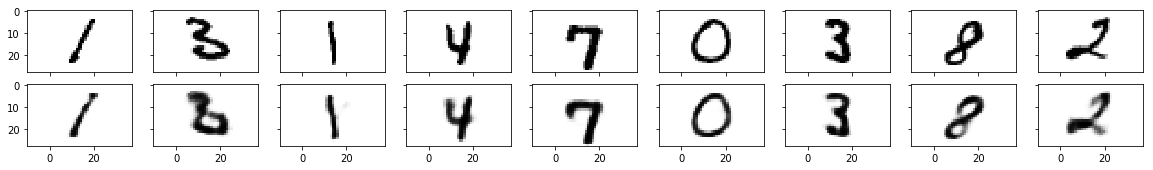

In [20]:
# reconstruction of train set
fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, dec]):
        ax[i].imshow(img[i].detach().reshape((image_width, image_width)), cmap='binary')

### Test set

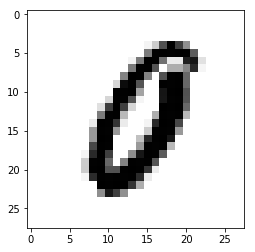

In [21]:
# Random img in the test set
test_img = test_dataset[random.randint(0, len(test_dataset))][0]
plt.imshow(test_img.reshape([image_width,image_width]),cmap='binary')

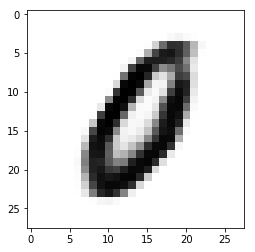

In [22]:
# Reconstruction using autoencoder
[test_enc,z_mean,z_log_var] = model.encoder(test_img.reshape([1,image_width*image_width]))
test_dec = model.decoder(test_enc).detach().numpy()

plt.imshow(test_dec.reshape([image_width,image_width]),cmap='binary')

## Latent Codes

In [127]:
batch_size = len(train_dataset)
batch_size_test = len(test_dataset)
SHUFFLE_TR = False
SHUFFLE_TS = False

Xtrain = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=SHUFFLE_TR)
Xtest = DataLoader(dataset=test_dataset, batch_size=batch_size_test, shuffle=SHUFFLE_TS)

In [128]:
for batch_idx, (features, targets_tr) in enumerate(Xtrain):
    features_tr = features.view(-1, 28*28)
print(batch_idx)

0


In [129]:
features_tr.shape

torch.Size([60000, 784])

In [130]:
[latent_tr,z_mean,z_log_var] = model.encoder(features_tr)
print(latent_tr.shape)
print(targets_tr.shape)

torch.Size([60000, 15])
torch.Size([60000])


In [131]:
for batch_idx, (features, targets_ts) in enumerate(Xtest):
    features_ts = features.view(-1, 28*28)
print(batch_idx)

0


In [132]:
[latent_ts,z_mean,z_log_var] = model.encoder(features_ts)
print(latent_ts.shape)
print(targets_ts.shape)

torch.Size([10000, 15])
torch.Size([10000])


In [133]:
torch.save(latent_tr, 'VAE_FMNIST-latent_tr.pth')
torch.save(latent_ts, 'VAE_FMNIST-latent_ts.pth')

torch.save(targets_tr, 'VAE_FMNIST-targets_tr.pth')
torch.save(targets_ts, 'VAE_FMNIST-targets_ts.pth')

# Creating Generator from AE

In [57]:
generator = generative_lib.VAE_gen(num_features, num_hidden_1, num_latent)

In [58]:
# copying weight in the generator
net_weight_dict = model.state_dict()
gen_weight_dict = {}

gen_weight_dict['linear_3.weight'] = net_weight_dict['linear_3.weight']
gen_weight_dict['linear_3.bias']   = net_weight_dict['linear_3.bias']
gen_weight_dict['linear_4.weight'] = net_weight_dict['linear_4.weight']
gen_weight_dict['linear_4.bias']   = net_weight_dict['linear_4.bias']

generator.load_state_dict(gen_weight_dict)

In [59]:
# freeze weigths
generative_lib.froze_weights(generator)

# Projection

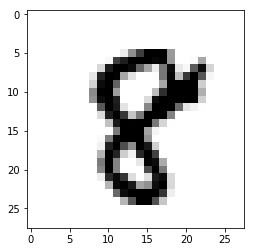

In [85]:
# Random img in the test set
test_img = test_dataset[random.randint(0, len(test_dataset))][0]
plt.imshow(test_img.reshape([image_width,image_width]),cmap='binary')

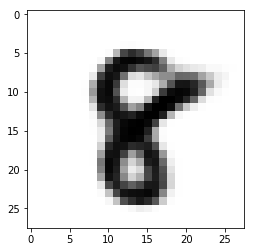

In [86]:
# Reconstruction using autoencoder
[test_enc,z_mean,z_log_var] = model.encoder(test_img.reshape([1,image_width*image_width]))
test_dec = model.decoder(test_enc).detach().numpy()

plt.imshow(test_dec.reshape([image_width,image_width]),cmap='binary')

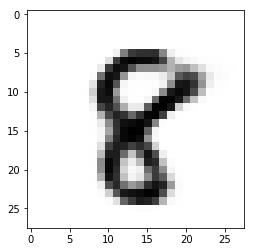

In [102]:
# reconstruction by projection
maxit = 5
gamma  = 0.1
x0    = test_enc
Gstar = test_img.reshape(image_width*image_width) #model.decoder(test_enc).detach()
rand_init = 0
sigma = 2

[l2_loss_var,xk] = generative_lib.Full_Projection(generator, Gstar, maxit, gamma, rand_init, sigma, x0)

pctk = generator(xk)
plt.imshow(pctk.detach().numpy().reshape(image_width,image_width),  cmap='Greys')

In [103]:
tmp = test_dec.reshape(image_width*image_width) - test_img.reshape(image_width*image_width)
print(torch.norm(tmp))

tensor(3.7439)


In [104]:
tmp = pctk.reshape(image_width*image_width) - test_img.reshape(image_width*image_width)
print(torch.norm(tmp))

tensor(3.1135)
